<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/6-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

머신러닝에서 차원은 크게 3가지 의미로 쓰임

1.   특성
2.   흔히 생각하는 1차원 2차원 3차원
3.   모델의 파라미터




비지도 학습 중 하나인 차원 축소  
특성이 많으면 저장 공간이 부족할 수 있고 과대적합될 수 있음  
차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킴

또한 줄어든 차언에서 다시 원본 차원으로 손실 줄이면서 복원할 수도 있음


## PCA 클래스

주성분 분석은 분산이 큰 방향을 찾는 것  
분산은 데이터가 널리 퍼져 있는 정도  
분산이 큰 방향 = 데이터를 잘 표현하는 어떤 벡터 = 주성분  
사이킷런의 pca는 자동으로 특성마다 평균값을 빼서 원점에 맞춰줌  
주성분 벡터 원소 개수 = 특성 개수


첫번째 주성분을 찾고 그 벡터에 수직이고 분산이 가장 큰 다음 방향 찾기 -> 2번째 주성분

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-28 03:18:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-28 03:18:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-28 03:18:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [4]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

n_components에 주성분 개수 지정

In [7]:
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

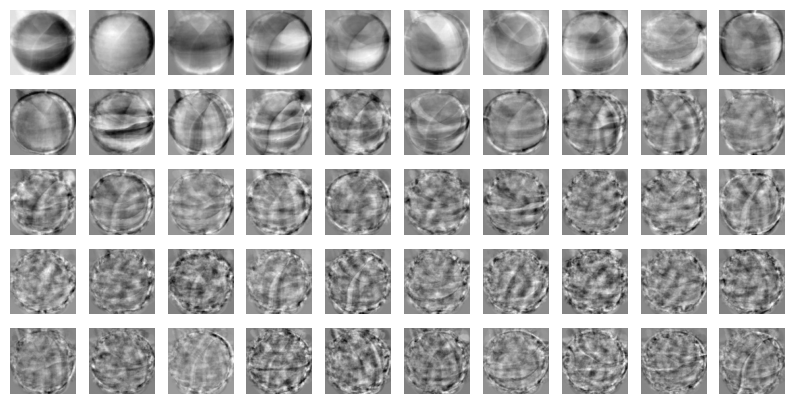

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 순서대로 나타냄  
데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있음

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
fruits_pca = pca.transform(fruits_2d)

In [12]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [13]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


축소한 것 원래대로 복원

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

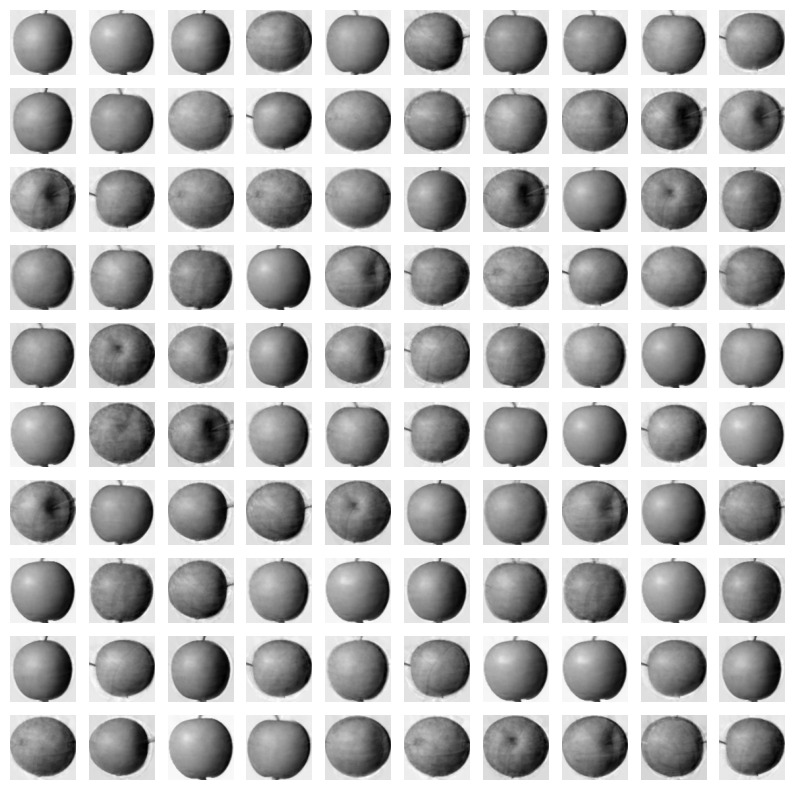

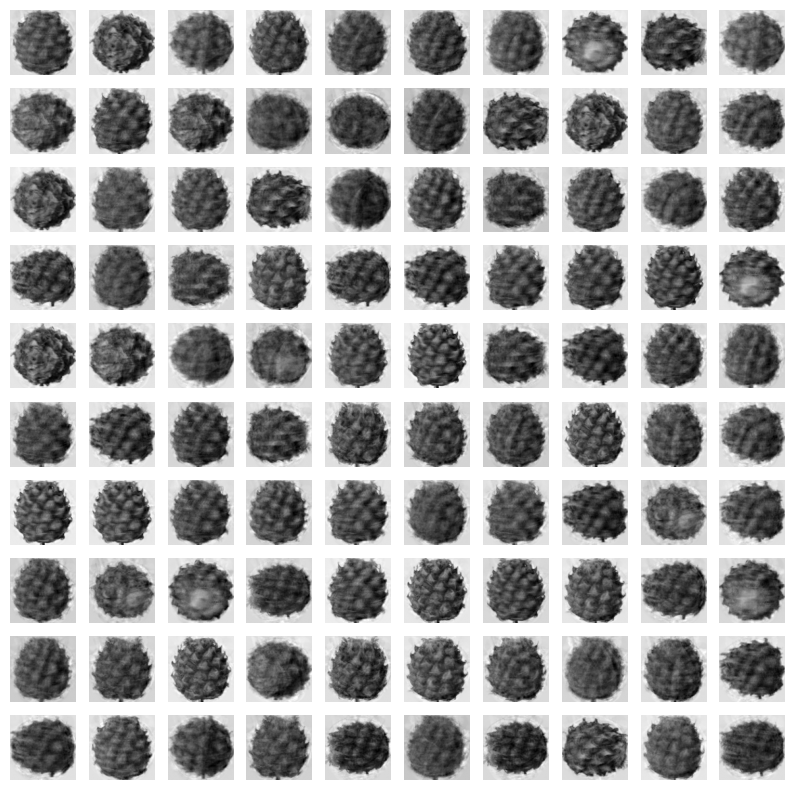

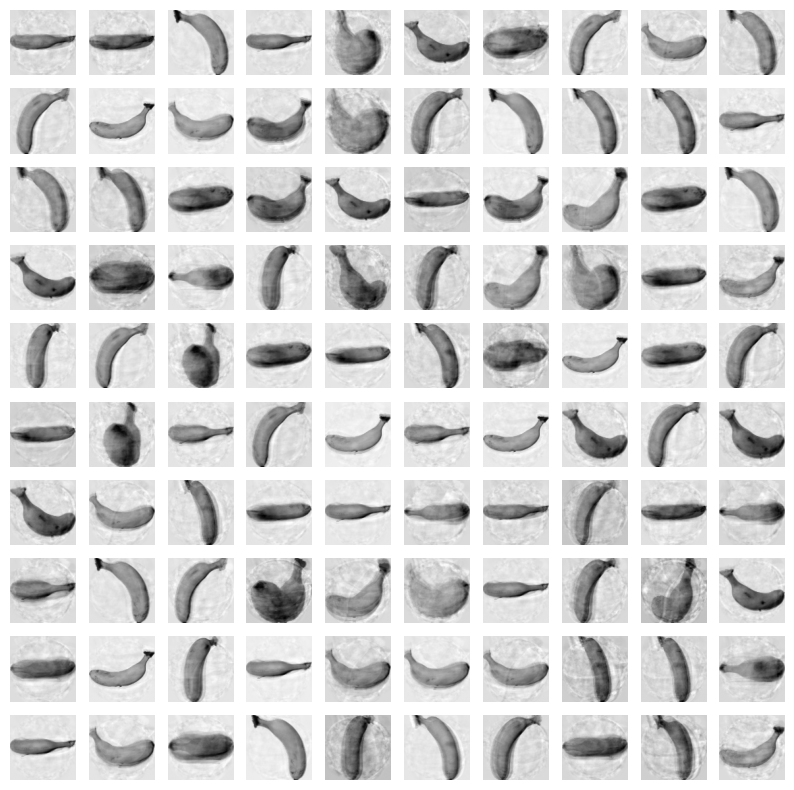

In [15]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

흐리고 번진 부분은 있지만 특성 수를 200분의1로 줄인 걸 감안하면 매우 잘 복원함

## 설명된 분산

설명된 분산 : 주성분이 원본 데이터를 얼마나 잘 나타내는 지 기록한 값

In [16]:
print(np.sum(pca.explained_variance_ratio_))

0.9214894488348595


50개의 분산 비율의 합  
복원 이미지 품질이 높은 이유 확인

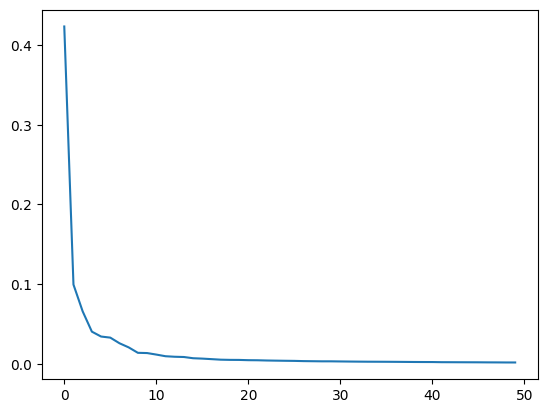

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

원본 데이터와 PCA 축소 데이터 각각 지도학습에 써보고 차이 확인해보자

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

사과 0 파인애플 1 바나나 2로 타깃 설정

In [21]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.240666961669922


원본 데이터 사용

In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.011255788803100585


PCA로 축소한 데이터 사용

속도가 훨씬 줄어드는 모습 확인 가능

In [23]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
print(pca.n_components_)

2


pca에서 n_components는 원래 주성분의 개수인데, 원하는 설명된 분산 비율 넣을 수도 있음  
pca는 지정된 비율에 도달할때까지 주성분 찾음  
위의 경우에는 설명된 분산의 50% 도달하려면 주성분 2개 필요

In [25]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [26]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03224987983703613


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2개만 썼는데도 교차검증 결과값 99퍼 이상

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

축소된 데이터로 k 평균 진행

In [28]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


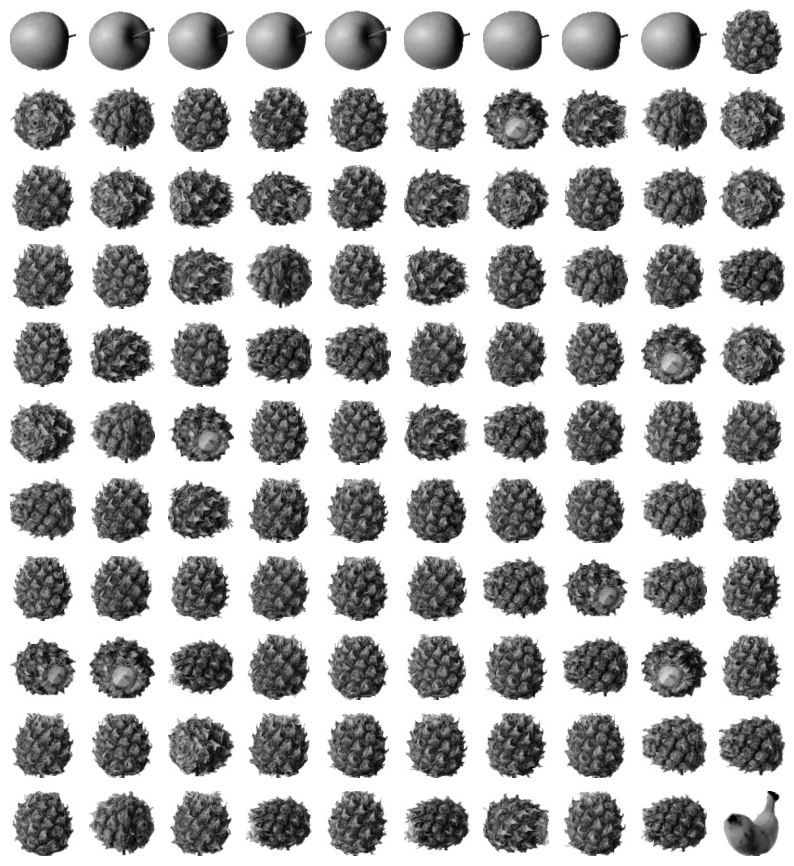

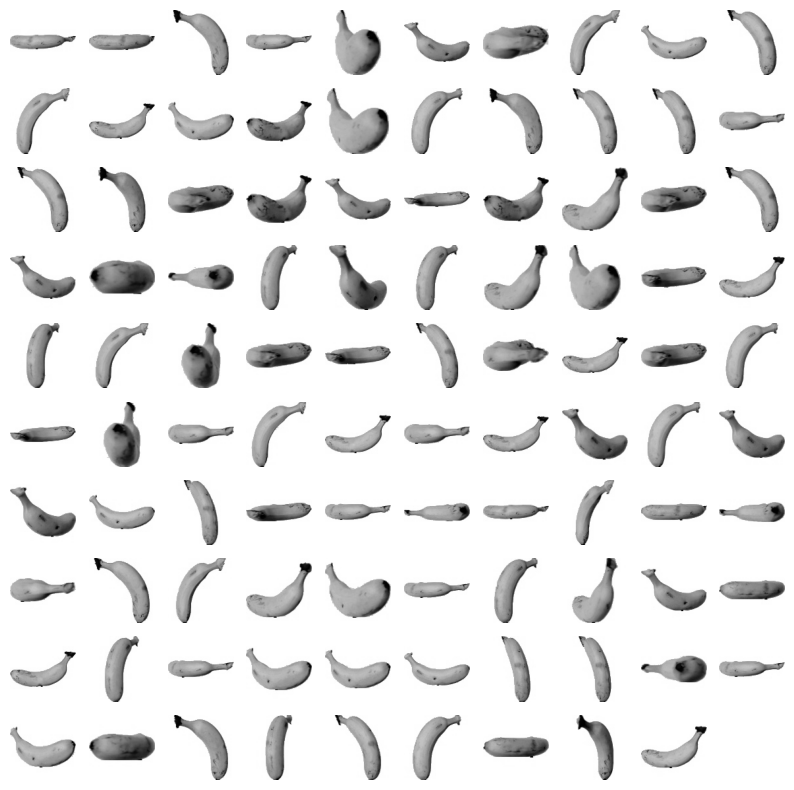

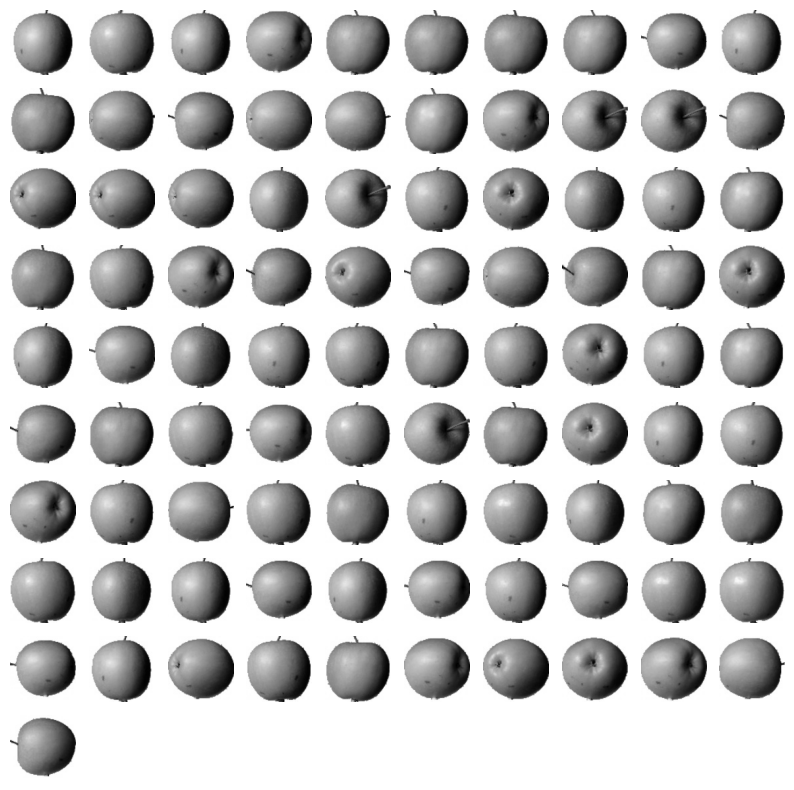

In [29]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

몇개 틀리긴함 2절과 비슷

차원 줄이면 또 좋은 점은 시각화 용이함

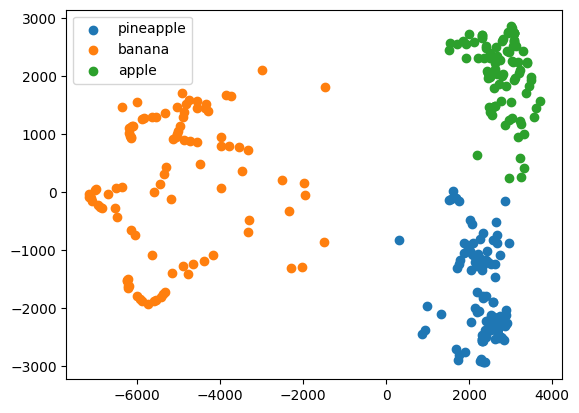

In [30]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

산점도가 아주 이쁘게 나뉨  
사과랑 파인애플은 경계가 가까우므로 혼동 일으키기 쉬울 듯